In [1]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.time_utils import TimeProcessorConv2d

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_conv2d = TimeProcessorConv2d(base_dir)
df = time_processor_conv2d.get_data(sample_rate=0.3)

/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/utils/time_utils.py:216: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs, axis=0, ignore_index=True)


In [6]:
df.query("time < 0")

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops
49365,b16.32.1024.32.1024.4096.1024.7.3.1.1.0,-4.0,b16,32,1024,32,1024,4096,1024,7,3,1,1,0,184717.953466
49391,b16.32.1024.32.1024.4096.1024.5.5.1.1.0,-4.0,b16,32,1024,32,1024,4096,1024,5,5,1,1,0,219902.325555
49556,b16.32.1024.32.1024.4096.1024.5.3.1.1.0,-4.0,b16,32,1024,32,1024,4096,1024,5,3,1,1,0,131941.395333
49783,32.32.512.32.1024.4096.512.7.7.1.1.0,-4.0,32,32,512,32,1024,4096,512,7,7,1,1,0,215504.279044
50013,32.32.1024.32.1024.4096.1024.5.5.1.1.0,-4.0,32,32,1024,32,1024,4096,1024,5,5,1,1,0,219902.325555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137020,16.4.1024.1024.1024.1024.512.3.3.1.1.1,-1.0,16,4,1024,1024,1024,1024,512,3,3,1,1,1,79164.837200
137021,b16.4.1536.1024.1024.1536.256.7.3.1.1.1,-1.0,b16,4,1536,1024,1024,1536,256,7,3,1,1,1,415615.395299
137022,32.16.128.1024.1024.128.64.5.7.1.1.1,-1.0,32,16,128,1024,1024,128,64,5,7,1,1,1,19241.453486
137023,16.8.64.1024.1024.64.64.5.3.1.1.1,-1.0,16,8,64,1024,1024,64,64,5,3,1,1,1,1030.792151


In [7]:
df["time"].isna().sum()

5060

In [9]:
df = df.query("time >= 0").dropna()

In [10]:
df

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops
0,16.8.2048.8.8.4096.512.7.5.1.1.0,0.058368,16,8,2048,8,8,4096,512,7,5,1,1,0,300.647711
1,b16.2.1024.8.8.128.128.3.5.1.1.0,0.032768,b16,2,1024,8,8,128,128,3,5,1,1,0,0.503316
2,32.4.1024.8.8.512.256.3.7.1.1.0,0.025600,32,4,1024,8,8,512,256,3,7,1,1,0,5.637145
3,b16.4.8.8.8.1024.1.5.3.1.1.0,0.024576,b16,4,8,8,8,1024,1,5,3,1,1,0,0.062915
4,32.16.512.8.8.2048.512.5.7.1.1.0,0.025600,32,16,512,8,8,2048,512,5,7,1,1,0,75.161928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135728,b16.32.128.1024.1024.128.64.3.5.1.1.0,206.483459,b16,32,128,1024,1024,128,64,3,5,1,1,0,16492.674417
136086,b16.2.16.1024.1024.16.1.3.3.1.1.1,0.758784,b16,2,16,1024,1024,16,1,3,3,1,1,1,9.663676
136649,b16.2.128.1024.1024.128.1.3.3.1.1.1,3.998208,b16,2,128,1024,1024,128,1,3,3,1,1,1,618.475291
136737,b16.2.32.1024.1024.32.1.3.3.1.1.1,0.930304,b16,2,32,1024,1024,32,1,3,3,1,1,1,38.654706


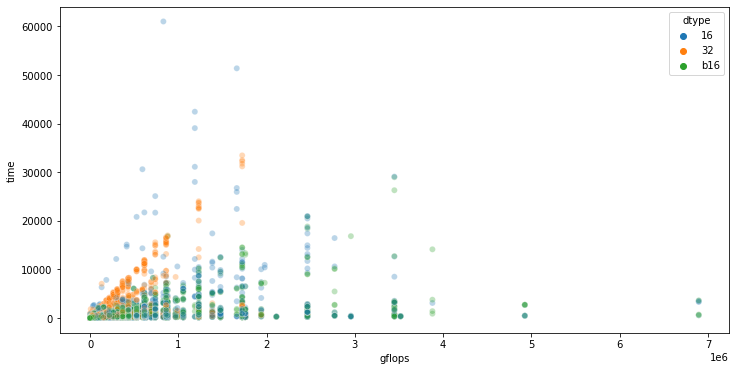

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.8, data=df)
plt.show()

32---------------------------------------


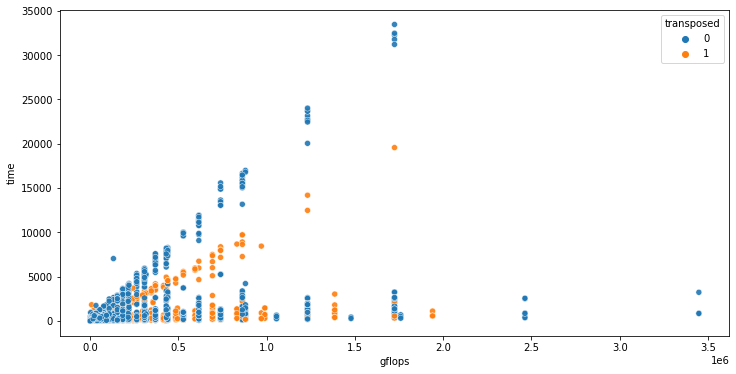

b16---------------------------------------


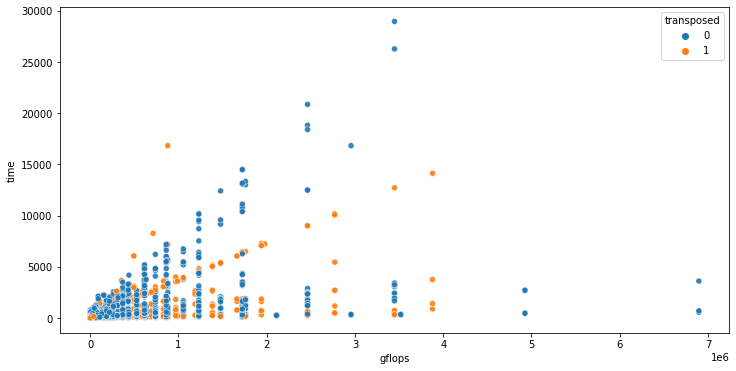

16---------------------------------------


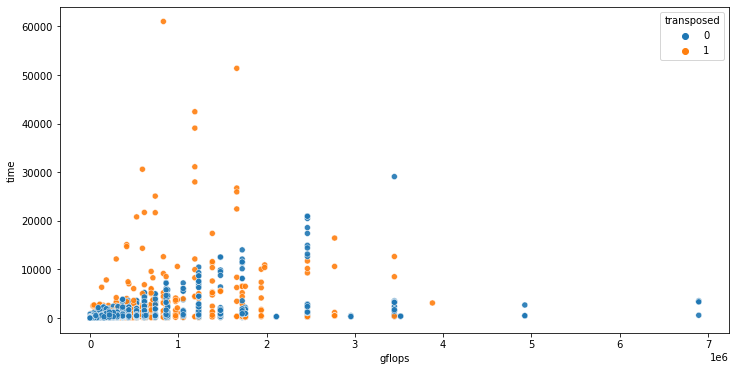

In [15]:
for dtype in ["32", "b16", "16"]:
    print(f"{dtype}---------------------------------------")
    plt.figure(figsize=(12,6))
    sns.scatterplot(x="gflops", y="time", hue="transposed", alpha=0.9, data=df.query(f"dtype == '{dtype}'"))
    plt.show()